In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns; sns.set_theme()

In [29]:
df = pd.read_excel('Election_Vulnerability_Index_downloadable_data 1.28.22.xlsx', sheet_name = 1, header=2)
df

,Country/Territory,Region,Election Type,"Election Month, Year",A1,A2,A3,A4,A5,A6,...,C2,C3,C4,C5,C6,C7,C8,C9,C,Total
0,Albania,Europe,Parliamentary,"April, 2021",4,2,2,4,2,2,...,4,4,3,2,2,2,3,4,26,68
1,Angola,SSA,General,"August, 2022",3,4,4,3,1,3,...,2,2,2,1,1,1,2,4,16,46
2,Argentina,Americas,Legislative,"October, 2021",4,3,2,3,2,3,...,4,4,4,2,3,2,3,4,29,80
3,Bulgaria,Europe,Parliamentary,"April, 2021",4,4,2,2,2,2,...,4,4,4,3,2,3,2,4,28,76
4,Burkina Faso,SSA,General,"November, 2020",4,4,4,4,2,2,...,3,3,2,2,2,0,2,4,20,65
5,Chad,SSA,Presidential,"April, 2021",2,2,2,2,2,2,...,2,1,1,0,1,0,0,4,10,30
6,Chile,Americas,General,"November, 2021",4,4,2,4,2,4,...,4,3,4,4,4,2,3,4,32,91
7,Colombia,Americas,Presidential,"May, 2022",4,3,2,3,2,3,...,3,2,2,3,2,2,2,4,22,66
8,Costa Rica,Americas,General,"February, 2022",4,4,3,3,3,4,...,4,4,4,4,3,3,3,4,33,91
9,Cote d'Ivoire,SSA,Presidential,"October, 2020",2,2,2,2,2,2,...,3,2,3,1,1,2,2,4,20,54


Text(0.5, 1.0, 'Digital Sphere of Different Regions')

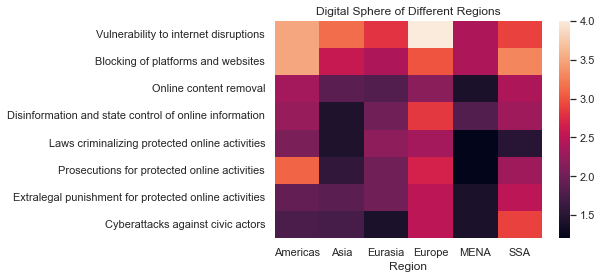

In [35]:
data = df.groupby(['Region']).mean()
y_axis_labels = ['Vulnerability to internet disruptions','Blocking of platforms and websites', "Online content removal",
                'Disinformation and state control of online information', 'Laws criminalizing protected online activities',
                'Prosecutions for protected online activities', 'Extralegal punishment for protected online activities',
                'Cyberattacks against civic actors']
data = data[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']]
data
ax = sns.heatmap(data.transpose(), yticklabels=y_axis_labels)
ax.set_title('Digital Sphere of Different Regions')